<a href="https://colab.research.google.com/github/utkzas/Exploratory-Analysis-of-Geolocational-Data/blob/main/Foursquare_API_Exploratory_Analysis_of_Geolocational_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle 

In [ ]:
#To upload kaggle.json file from local system
from google.colab import files
files.upload()
import folium as f
import json
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

Saving kaggle.json to kaggle (9).json


In [ ]:
#create directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy json file to kaggle folder
!cp kaggle.json ~/.kaggle/

In [ ]:
#Change premission of json file to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# To list all dataset in kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          17994  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10708  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5346  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3844  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
#Downloading Required Dataset from kaggle
! kaggle datasets download -d borapajo/food-choices

food-choices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzipping .zip file
!unzip food-choices.zip

Archive:  food-choices.zip
replace codebook_food.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: codebook_food.docx      
replace food_coded.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: food_coded.csv          


In [ ]:
full_dataset=pd.read_csv("food_coded.csv");
print(full_dataset.head())
print(full_dataset.info())
#print(full_dataset.describe())

     GPA  Gender  ...  waffle_calories                    weight
0    2.4       2  ...             1315                       187
1  3.654       1  ...              900                       155
2    3.3       1  ...              900  I'm not answering this. 
3    3.2       1  ...             1315             Not sure, 240
4    3.5       1  ...              760                       190

[5 rows x 61 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffe

In [ ]:
relevent=full_dataset[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
missing_values_count = relevent.isnull().sum()
print(missing_values_count)
# how many total missing values do we have?
total_cells = np.product(relevent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)



cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64
2.109090909090909


In [ ]:
#As percent missing is less than 5%,we are dropping rows containing missing values.
relevent_with_no_na=relevent.dropna(axis=0)
print(relevent_with_no_na.shape[0])

100


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

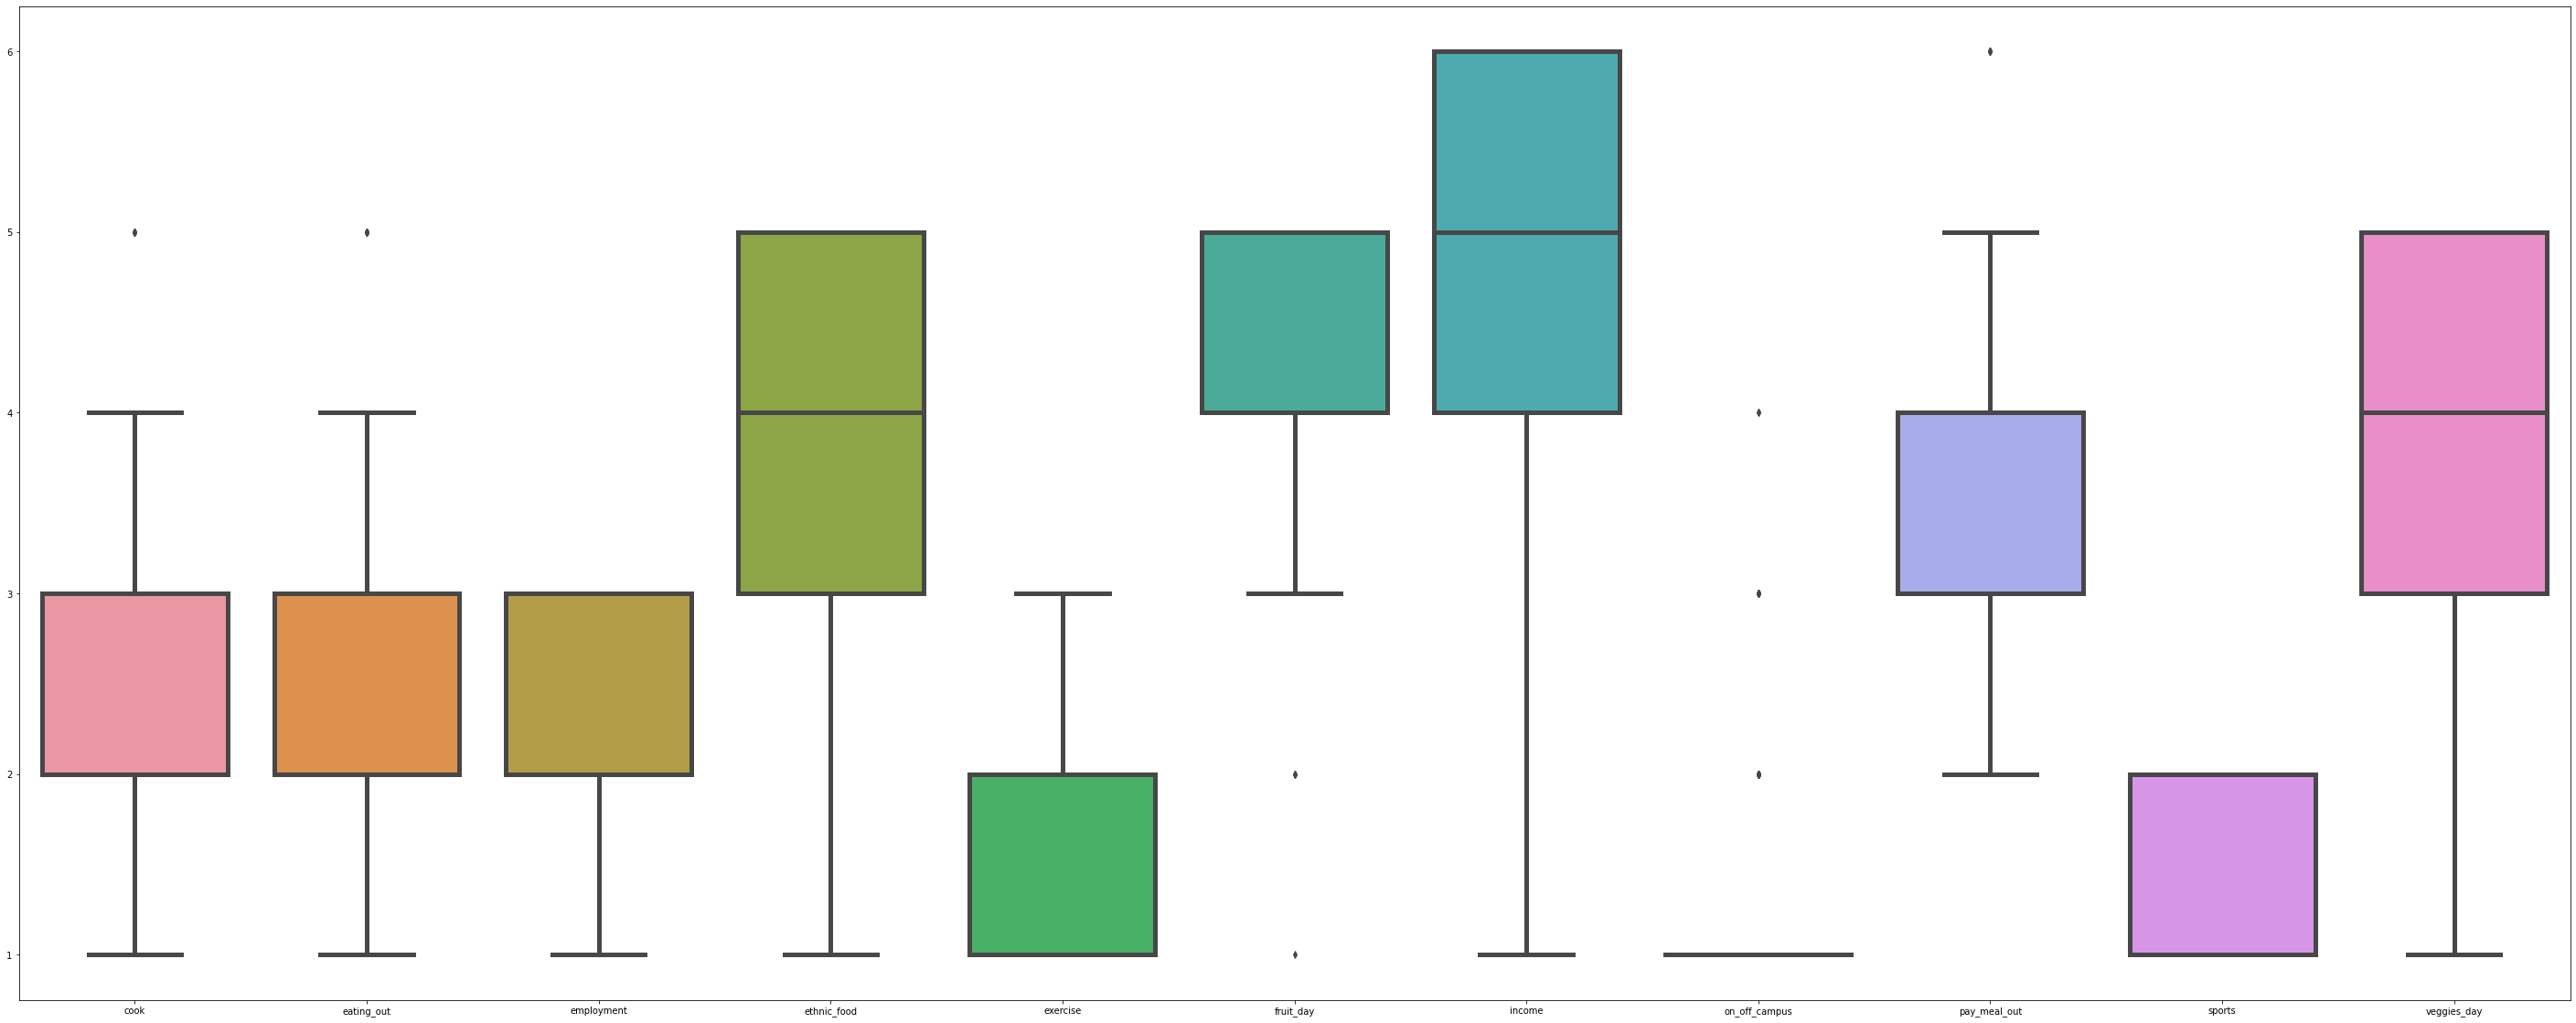

In [ ]:
fig = plt.figure(figsize =(50, 20))
 
# Creating plot
ax=sns.boxplot(data=relevent_with_no_na,linewidth=5)

# show plot
plt.show()

In [ ]:
CLIENT_ID='5XTKK2W51HSV3ON2KCZNRDM13GY5SAETOHRT5EOEZZAMRXLZ'
CLIENT_SECRET='POGKGQXORUNGLSLB1EQ5CAOD2HU4VG5XLNP3EHLBQ1Y4YIOM'
search_query = 'university' #Search for residential locations
radius = 100000
latitude= 28.921059
longitude= 77.052399
VERSION = '20200604'
LIMIT = 100


In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,latitude, longitude, VERSION, search_query,radius,LIMIT)


In [ ]:
results = requests.get(url).json()

In [ ]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.address,location.crossStreet,location.neighborhood,location.postalCode
0,5110e52de4b0c5da20a7bcc2,Jindal Global University,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1639821984,False,28.926401,77.056798,"[{'label': 'display', 'lat': 28.92640051635382...",732,IN,Sonīpat,Haryāna,India,"[Sonīpat, Haryāna, India]",NaN,NaN,NaN,NaN
1,5502d429498e6dd512cee8cc,Overnight Gardens - Ashoka University,"[{'id': '4bf58dd8d48988d15a941735', 'name': 'G...",v-1639821984,False,28.946166,77.101122,"[{'label': 'display', 'lat': 28.94616569642809...",5508,IN,NaN,NaN,India,[India],NaN,NaN,NaN,NaN
2,5503093e498eb64a120c114f,Shuddh Desi Dhaba - Ashoka University,"[{'id': '54135bf5e4b08f3d2429dfe1', 'name': 'D...",v-1639821984,False,28.946041,77.100762,"[{'label': 'display', 'lat': 28.9460414182055,...",5471,IN,NaN,NaN,India,[India],NaN,NaN,NaN,NaN
3,5404ad44498e40d84a1aab63,Ashoka University,"[{'id': '4bf58dd8d48988d1ae941735', 'name': 'U...",v-1639821984,False,28.945940,77.102159,"[{'label': 'display', 'lat': 28.94593991322451...",5583,IN,Sonīpat,Haryāna,India,"[Sonīpat, Haryāna, India]",NaN,NaN,NaN,NaN
4,5112089de4b048b801b5f912,chhoturam chowdhry university,"[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",v-1639821984,False,28.989013,77.058613,"[{'label': 'display', 'lat': 28.98901262789119...",7588,IN,Sonīpat,Haryāna,India,"[Sonīpat, Haryāna, India]",NaN,NaN,NaN,NaN


In [ ]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
#print(dataframe_filtered.columns)
dataframe_filtered.drop([4,17,18],axis=0,inplace=True) #remove some unwanted locations like hotels
dataframe_filtered.drop(['cc','country','state','city'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
dataframe_filtered.head()

,name,categories,lat,lng,labeledLatLngs,distance,formattedAddress,address,crossStreet,neighborhood,postalCode,id
0,Jindal Global University,General College & University,28.926401,77.056798,"[{'label': 'display', 'lat': 28.92640051635382...",732,"[Sonīpat, Haryāna, India]",NaN,NaN,NaN,NaN,5110e52de4b0c5da20a7bcc2
1,Overnight Gardens - Ashoka University,Garden,28.946166,77.101122,"[{'label': 'display', 'lat': 28.94616569642809...",5508,[India],NaN,NaN,NaN,NaN,5502d429498e6dd512cee8cc
2,Shuddh Desi Dhaba - Ashoka University,Dhaba,28.946041,77.100762,"[{'label': 'display', 'lat': 28.9460414182055,...",5471,[India],NaN,NaN,NaN,NaN,5503093e498eb64a120c114f
3,Ashoka University,University,28.945940,77.102159,"[{'label': 'display', 'lat': 28.94593991322451...",5583,"[Sonīpat, Haryāna, India]",NaN,NaN,NaN,NaN,5404ad44498e40d84a1aab63
5,Sir Chhotu Ram Choudhry University Murthal,Auditorium,29.023611,77.065483,"[{'label': 'display', 'lat': 29.023611, 'lng':...",11486,[Sir Chhotu Ram Chowdhry University Murthal (U...,Sir Chhotu Ram Chowdhry University Murthal,University Library,NaN,NaN,519c6687498e4750731af3fe


In [ ]:
#define coordinates of the college
map_bang=f.Map(location=[28.921059,77.052399],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()

latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
labels = list(dataframe_filtered.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    f.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang

In [ ]:
df_evaluate=dataframe_filtered[['lat','lng']]

In [ ]:
RestList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 100000
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Restaurants']=RestList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
FruitList=[]
latitudes = list(dataframe_filtered.lat)
longitudes = list( dataframe_filtered.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 100000
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'food' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,Restaurants,"Fruits,Vegetables,Groceries",Cluster
0,28.926401,77.056798,48,46,1
1,28.946166,77.101122,45,49,2
2,28.946041,77.100762,45,49,2
3,28.945940,77.102159,45,49,2
5,29.023611,77.065483,45,49,2
6,29.023863,77.059929,45,49,2
7,28.688196,77.208840,46,50,2
8,28.695399,77.175390,49,50,0
9,28.690881,77.213730,46,50,2
10,28.690975,77.201563,47,50,0


In [ ]:
#define coordinates of the college
map_bang=f.Map(location=[28.921059,77.052399],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = f.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(dataframe_filtered.name)
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    f.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=0.5,
            popup=f.Popup(names, max_width = 300),
            radius=105,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
f.Marker([28.921059,77.052399],popup='Pinned Location').add_to(map_bang)
map_bang.add_child(locations)
map_bang


#saving the map 
map_bang.save("answ.html")

Applying K-Means, we find 3 prominent clusters:

Cluster 0(Green) Where both gym and (restaurants) are abundant

Cluster 1(Yellow): Restaurants are plentiful, but gym less so.

Cluster 2(Red): Restaurants and gym are relatively hard to find.

Now, one can easily predict where which kind of student will prefer to stay!